In [2]:
import torch
import torchvision #this package includes many of the most popular datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split

import numpy as np

#plotting
import matplotlib.pyplot as plt

In [3]:
# load the data
batch_size = 256
data_path='./data/food_items'

dtype = torch.float

# for apple m1 or m2 chips
device = torch.device("mps")

# for devices other than apple, uncomment this line
#device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

RuntimeError: shape '[128, 128]' is invalid for input of size 49152

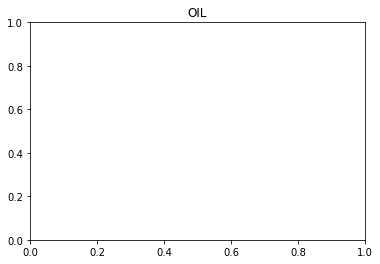

In [4]:
# Define a transform
transform = transforms.Compose([
            transforms.Resize((128, 128)),
            transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])



# Load the entire dataset
full_dataset = torchvision.datasets.ImageFolder(root=data_path, transform=transform)

# Split the dataset into training and testing sets
train_size = int(0.8 * len(full_dataset))
test_size = len(full_dataset) - train_size
food_train, food_test = random_split(full_dataset, [train_size, test_size])

class_names = full_dataset.classes

trainloader = DataLoader(food_train, batch_size=batch_size, shuffle=True, drop_last=True)
testloader = DataLoader(food_test, batch_size=batch_size, shuffle=True, drop_last=True)

images, labels = next(iter(trainloader))
plt.title(class_names[labels[0].item()])
plt.imshow(images[0].reshape(128, 128), cmap="gray")

In [5]:
print(images.shape)
print(class_names[labels[0]])

torch.Size([256, 3, 128, 128])
OIL


In [6]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        
        self.pool = nn.MaxPool2d(2, 2)
        
        self.fc1 = nn.Linear(128 * 16 * 16, 512)
        self.fc2 = nn.Linear(512, 25)
        
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        
        x = x.view(-1, 128 * 16 * 16)
        
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x


net = Net() 
net.to(device)


Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=32768, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=25, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)

In [7]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)


In [8]:
print(f"Total number of batches: {len(trainloader)}")


Total number of batches: 15


In [53]:
import time
start_time = time.time()
for epoch in range(50):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if (i%10 == 0):    
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 15:.3f} | time: {time.time() - start_time:.2f}s')
            running_loss = 0.0
end_time = time.time()  # Record end time
print('Finished Training')
print(f"Training took {end_time - start_time:.2f} seconds")

[1,     1] loss: 0.063 | time: 1.11s
[1,    11] loss: 0.629 | time: 10.89s
[2,     1] loss: 0.062 | time: 15.73s
[2,    11] loss: 0.618 | time: 25.40s
[3,     1] loss: 0.058 | time: 30.24s
[3,    11] loss: 0.582 | time: 39.92s
[4,     1] loss: 0.056 | time: 44.78s
[4,    11] loss: 0.559 | time: 54.45s
[5,     1] loss: 0.056 | time: 59.31s
[5,    11] loss: 0.556 | time: 68.97s
[6,     1] loss: 0.057 | time: 73.82s
[6,    11] loss: 0.550 | time: 83.52s
[7,     1] loss: 0.054 | time: 88.35s
[7,    11] loss: 0.544 | time: 98.03s
[8,     1] loss: 0.055 | time: 102.86s
[8,    11] loss: 0.546 | time: 112.57s
[9,     1] loss: 0.055 | time: 117.44s
[9,    11] loss: 0.549 | time: 127.16s
[10,     1] loss: 0.053 | time: 131.98s
[10,    11] loss: 0.543 | time: 141.70s
[11,     1] loss: 0.054 | time: 146.55s
[11,    11] loss: 0.548 | time: 156.25s
[12,     1] loss: 0.054 | time: 161.11s
[12,    11] loss: 0.540 | time: 170.80s
[13,     1] loss: 0.056 | time: 175.67s
[13,    11] loss: 0.547 | time: 1

KeyboardInterrupt: 

In [67]:
dic = {"BEANS":2, "CAKE":5,'CANDY':3, "CEREAL":1,'CHIPS':1, 'CHOCOLATE':19,'COFFEE':17, 'CORN':0.7, 'FISH':13.6, 'FLOUR':1.4, 'HONEY':1.4, 'JAM':1.5, 'JUICE':1, 'MilK':5.4, 'NUTS':0.4, 'OIL':3.8, 'PASTA':1.6, 'RICE':3.6, 'SODA':1, 'SPICES':1,'SUGAR':0.4, 'TEA':31.5, 'TOMATO SAUCE':1.4, 'VINEGAR':1,'WATER':1}

In [49]:
# save model
PATH = './model/model.pth'
torch.save(net.state_dict(), PATH)
# load model
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [90]:
correct = 0
total = 0

with torch.no_grad():  # We don't need gradients for evaluation
    for data in testloader:  # Assuming test_loader is your validation/test data loader
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        outputs = net(images)
        
        # Get the predicted class for each sample in the batch
        _, predicted = torch.max(outputs.data, 1)
        
        # Update total number of samples and number of correct predictions
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the network on the test images: {accuracy:.2f}%')


Accuracy of the network on the test images: 81.38%


In [47]:
import random

for i in range(20):
    images, labels = next(iter(testloader))
    images = images.to(device)
    labels = labels.to(device)
    output = net(images)
    _, predicted_class = torch.max(output, 1)

    print(f"Predicted Class: {class_names[predicted_class[0]]}")
    print(f"Correct Class: {class_names[labels[0]]}")

Predicted Class: CHOCOLATE
Correct Class: CHOCOLATE
Predicted Class: TEA
Correct Class: TEA
Predicted Class: PASTA
Correct Class: PASTA
Predicted Class: MILK
Correct Class: MILK
Predicted Class: FLOUR
Correct Class: FLOUR
Predicted Class: VINEGAR
Correct Class: VINEGAR
Predicted Class: SPICES
Correct Class: SPICES
Predicted Class: CANDY
Correct Class: CANDY
Predicted Class: TEA
Correct Class: TEA
Predicted Class: SODA
Correct Class: SODA
Predicted Class: SODA
Correct Class: WATER
Predicted Class: CANDY
Correct Class: CANDY
Predicted Class: COFFEE
Correct Class: COFFEE
Predicted Class: RICE
Correct Class: RICE
Predicted Class: SODA
Correct Class: SODA
Predicted Class: CHOCOLATE
Correct Class: CHOCOLATE
Predicted Class: CHOCOLATE
Correct Class: CHOCOLATE
Predicted Class: FISH
Correct Class: FISH
Predicted Class: SPICES
Correct Class: SPICES
Predicted Class: SPICES
Correct Class: CORN


In [98]:
from PIL import Image

def predict_image(image_path, model, transform, class_names):
    # Load the image
    image = Image.open(image_path).convert('RGB')  # Ensure it's in RGB mode
    
    # Apply the same transformations as during training
    image_tensor = transform(image).unsqueeze(0)  # Add a batch dimension
    
    # Move tensor to device
    image_tensor = image_tensor.to(device)
    
    # Make prediction
    with torch.no_grad():
        model.eval()  # Set the model to evaluation mode
        outputs = model(image_tensor)
        _, predicted = outputs.max(1)  # Get the index of the max log-probability
        predicted_class = class_names[predicted.item()]
    
    return predicted_class

# Usage
image_path = "images/pasta.png"
predicted_image = predict_image(image_path, net, transform, class_names)
print(f"The model predicts that the image is: {predicted_image}")


The model predicts that the image is: PASTA


In [99]:
print(f"The average carbon footprint of {predicted_image} is {dic[predicted_image]}kg.")

The average carbon footprint of PASTA is 1.6kg.
